* # **Preparação:**

## Importando a biblioteca 

In [3]:
# Se não estiver instalado, instale o pacote tidyverse:
if (!require("tidyverse")) install.packages("tidyverse")
library(tidyverse) # utilizando a biblioteca tidyverse

# Coloque abaixo o caminho do diretório em que foi clonado o repositório:
path <- "/home/calili_trybe/Área de Trabalho/Google Certificate/Dados/Repo Desafio Final/data_and_notebooks"

#Listando os arquivos do diretório:
print("Arquivos do diretório:")
list.files(path = path)

[1] "Arquivos do diretório:"


[1] "labor-in-brazil-2012-2023.ipynb"    "tabela_1736_sidra_ibge.csv"        
[3] "tabela_5434_sidra_ibge.csv"         "tabela_5442_sidra_ibge.csv"        
[5] "trabalho-no-brasil-2012-2023.ipynb"

## Lendo os arquivos

In [4]:
# Utilizando os atributos sep and header por conta da estrutura do csv exportado no IBGE.

reading_files <- function(file_path) {
    return(
        read.csv(file_path, sep=";", header=FALSE)
    )
}

workers_quantity_file <- "tabela_5434_sidra_ibge.csv"
workers_salary_file <- "tabela_5442_sidra_ibge.csv"
brazil_price_index <- "tabela_1736_sidra_ibge.csv"

quantity_data <- reading_files(workers_quantity_file)
salary_data <- reading_files(workers_salary_file)
price_index_data <- reading_files(brazil_price_index)

## Visualizando quantity_data

In [5]:
# View(quantity_data)

# Visualizando salary_data

In [6]:
# View(salary_data)

# Visualizando price_index_data

In [7]:
# View(price_index_data)

# Removendo colunas e linhas desnecessárias

In [8]:
# drop utilizado para manter a primeira coluna 
# colnames para utilizar a primeira linha como nome das colunas, removendo ela no dataframe retornado.
remove_values <- function(dataframe, lines_to_remove) {
    dataframe <- dataframe[-lines_to_remove, , drop=FALSE]
    colnames(dataframe) <- dataframe[1, ]
    return(
        dataframe[-1, ]
    )
}

lines_to_remove_in_quantity_data <- c(1:3, 5, 51:63)
lines_to_remove_in_salary_data <- c(1:3, 50:62)
lines_to_remove_in_price_index_data <- c(1:2, 49:61)

# subset utilizado para remover as colunas selecionadas de acordo ao seu número.
quantity_data <- subset(remove_values(quantity_data, lines_to_remove_in_quantity_data), select=-2)
salary_data <- subset(remove_values(salary_data, lines_to_remove_in_salary_data), select=-c(2:3))
price_index_data <- subset(remove_values(price_index_data, lines_to_remove_in_price_index_data), select=-2)

# Visualizando quantity_data depois da remoção

In [9]:
# View(quantity_data)

# Visualizando salary_data depois da remoção

In [10]:
# View(salary_data)

# Visualizando price_index_data depois da remoção 

In [11]:
# View(price_index_data)

# Transpondo colunas dos dataframes

In [12]:
pivot_dataframe <- function(dataframe, value_column) {
    return(
        pivot_longer(
            dataframe,
            cols=-"Trimestre",
            names_to="Setor",
            values_to=value_column
        )
    )
}

quantity_data <- pivot_dataframe(quantity_data, "Quantidade")

salary_data <- pivot_dataframe(salary_data, "Salário")

# Sample dos dataframes após transposição

In [13]:
print("Amostra do dataframe de quantidade de trabalhadores:")
head(quantity_data)

print("Amostra do dataframe de salário de trabalhadores:")
head(salary_data)

[1] "Amostra do dataframe de quantidade de trabalhadores:"


Trimestre,Setor,Quantidade
<chr>,<chr>,<chr>
1º trimestre 2012,"Agricultura, pecuária, produção florestal, pesca e aquicultura",10147
1º trimestre 2012,Indústria geral,13075
1º trimestre 2012,Indústria de transformação,11640
1º trimestre 2012,Construção,7174
1º trimestre 2012,"Comércio, reparação de veículos automotores e motocicletas",16601
1º trimestre 2012,"Transporte, armazenagem e correio",4067


[1] "Amostra do dataframe de salário de trabalhadores:"


Trimestre,Setor,Salário
<chr>,<chr>,<chr>
1º trimestre 2012,"Agricultura, pecuária, produção florestal, pesca e aquicultura",1456
1º trimestre 2012,Indústria geral,2754
1º trimestre 2012,Indústria de transformação,2642
1º trimestre 2012,Construção,2202
1º trimestre 2012,"Comércio, reparação de veículos automotores e motocicletas",2366
1º trimestre 2012,"Transporte, armazenagem e correio",2877


# Juntando os dataframes quantidade e salário

In [14]:
common_columns <- c("Trimestre", "Setor")

dataframe <- merge(quantity_data, salary_data, by=common_columns)

# ordenando os dados pela coluna "Setor" com a função arrange
dataframe <- arrange(dataframe, Setor)

print("Amostra do dataframe de quantidade e salário de trabalhadores:")
head(dataframe)

[1] "Amostra do dataframe de quantidade e salário de trabalhadores:"


,Trimestre,Setor,Quantidade,Salário
,<chr>,<chr>,<chr>,<chr>
1,1º trimestre 2012,"Administração pública, defesa, seguridade social, educação, saúde humana e serviços sociais",13862,3841
2,1º trimestre 2013,"Administração pública, defesa, seguridade social, educação, saúde humana e serviços sociais",13937,3915
3,1º trimestre 2014,"Administração pública, defesa, seguridade social, educação, saúde humana e serviços sociais",14506,4017
4,1º trimestre 2015,"Administração pública, defesa, seguridade social, educação, saúde humana e serviços sociais",14650,4038
5,1º trimestre 2016,"Administração pública, defesa, seguridade social, educação, saúde humana e serviços sociais",15040,4004
6,1º trimestre 2017,"Administração pública, defesa, seguridade social, educação, saúde humana e serviços sociais",14743,4151


# Ajustando os tipos das colunas do dataframe

In [15]:
# Converter coluna "Quantidade" para inteiro
dataframe$Quantidade <- as.integer(dataframe$Quantidade)

# Converter coluna "Salario" para inteiro
dataframe$Salário <- as.integer(dataframe$Salário)

# Remover o trecho "º trimestre" dos valores da coluna "Trimestre"
dataframe$Trimestre <- sub("º trimestre", "", dataframe$Trimestre)

# Converter a coluna "Trimestre" para formato de data
dataframe$Trimestre <- parse_date_time(dataframe$Trimestre, "qY")

# Excluir linhas com valor "Atividades mal definidas" na coluna "Setor"
dataframe <- subset(dataframe, Setor != "Atividades mal definidas")

# Ajustando colunas do price_index_data

In [16]:
# Formatando a data da coluna mês de price_index_data
# Dicionário de correspondência dos meses
meses_numero <- c("janeiro" = 1, "abril" = 4, "julho" = 7, "outubro" = 10)

# Extrair o mês e o ano da coluna "Mês"
meses_ano <- strsplit(price_index_data$Mês, " ")
meses <- sapply(meses_ano, `[`, 1)
anos <- sapply(meses_ano, `[`, 2)

# Converter o mês para número utilizando o dicionário
meses_numero <- meses_numero[meses]

# Construir a data no formato desejado
data <- parse_date_time(paste0("01 ", paste(meses_numero, anos, sep = " ")), "dmY")

# Atualizar a coluna "Mês" com a data formatada
price_index_data$Mês <- data

# Renomear as colunas do dataframe price_index_data
colnames(price_index_data) <- c("Trimestre", "inflacao_trimestre")


# Converter inflacao_trimestre para número
price_index_data$inflacao_trimestre <- as.double(gsub(",", ".", price_index_data$inflacao_trimestre)) 

print("Amostra do dataframe de índice de preços:")
head(price_index_data)

[1] "Amostra do dataframe de índice de preços:"


,Trimestre,inflacao_trimestre
,<dttm>,<dbl>
4,2012-01-01,1.60
5,2012-04-01,1.21
6,2012-07-01,1.24
7,2012-10-01,1.80
8,2013-01-01,2.22
9,2013-04-01,1.72


# Criando coluna fator_inflacao_trimestre_acumulada

In [17]:
# criar coluna fator_inflacao_trimestre
price_index_data$fator_inflacao_trimestre <- (price_index_data$inflacao_trimestre / 100) + 1

# criar coluna fator_inflacao_trimestre_acumulada
price_index_data$fator_inflacao_trimestre_acumulada <- cumprod(price_index_data$fator_inflacao_trimestre)

# substituir o primeiro valor da coluna fator_inflacao_trimestre_acumulada por 1
price_index_data$fator_inflacao_trimestre_acumulada[1] <- 1

print("Amostra do dataframe de índice de preços final:")
head(price_index_data)

[1] "Amostra do dataframe de índice de preços final:"


,Trimestre,inflacao_trimestre,fator_inflacao_trimestre,fator_inflacao_trimestre_acumulada
,<dttm>,<dbl>,<dbl>,<dbl>
4,2012-01-01,1.60,1.0160,1.000000
5,2012-04-01,1.21,1.0121,1.028294
6,2012-07-01,1.24,1.0124,1.041044
7,2012-10-01,1.80,1.0180,1.059783
8,2013-01-01,2.22,1.0222,1.083310
9,2013-04-01,1.72,1.0172,1.101943


# Criando coluna salario_ajustado

In [18]:
# Loop para percorrer cada linha do dataframe
for (i in 1:nrow(dataframe)) {
  # Encontrar a correspondência da data no dataframe price_index
  index <- match(dataframe$Trimestre[i], price_index_data$Trimestre)
  
  dataframe$salario_ajustado[i] <- round(dataframe$Salário[i] / price_index_data$fator_inflacao_trimestre_acumulada[index], digits=2)
}

print("Amostra do dataframe com a coluna salário_ajustado pela inflação:")
head(dataframe)

[1] "Amostra do dataframe com a coluna salário_ajustado pela inflação:"


,Trimestre,Setor,Quantidade,Salário,salario_ajustado
,<dttm>,<chr>,<int>,<int>,<dbl>
1,2012-01-01,"Administração pública, defesa, seguridade social, educação, saúde humana e serviços sociais",13862,3841,3841.00
2,2013-01-01,"Administração pública, defesa, seguridade social, educação, saúde humana e serviços sociais",13937,3915,3613.92
3,2014-01-01,"Administração pública, defesa, seguridade social, educação, saúde humana e serviços sociais",14506,4017,3522.97
4,2015-01-01,"Administração pública, defesa, seguridade social, educação, saúde humana e serviços sociais",14650,4038,3305.93
5,2016-01-01,"Administração pública, defesa, seguridade social, educação, saúde humana e serviços sociais",15040,4004,2944.81
6,2017-01-01,"Administração pública, defesa, seguridade social, educação, saúde humana e serviços sociais",14743,4151,2895.79


# Listando valores da coluna Setor

In [19]:
print(unique(dataframe$Setor))

 [1] "Administração pública, defesa, seguridade social, educação, saúde humana e serviços sociais"    
 [2] "Agricultura, pecuária, produção florestal, pesca e aquicultura"                                 
 [3] "Alojamento e alimentação"                                                                       
 [4] "Comércio, reparação de veículos automotores e motocicletas"                                     
 [5] "Construção"                                                                                     
 [6] "Indústria de transformação"                                                                     
 [7] "Indústria geral"                                                                                
 [8] "Informação, comunicação e atividades financeiras, imobiliárias, profissionais e administrativas"
 [9] "Outro serviço"                                                                                  
[10] "Serviço doméstico"                                                 

# Criando coluna is_predominant_tech

In [20]:
is_predominant_tech_values <- c(
    "Indústria de transformação",
    "Indústria geral",
    "Informação, comunicação e atividades financeiras, imobiliárias, profissionais e administrativas"
)

dataframe$is_predominant_tech <- dataframe$Setor %in% is_predominant_tech_values

print("Amostra do dataframe com a coluna is_predominant_tech:")
head(subset(dataframe, is_predominant_tech == TRUE))

[1] "Amostra do dataframe com a coluna is_predominant_tech:"


,Trimestre,Setor,Quantidade,Salário,salario_ajustado,is_predominant_tech
,<dttm>,<chr>,<int>,<int>,<dbl>,<lgl>
271,2012-01-01,Indústria de transformação,11640,2642,2642.00,TRUE
272,2013-01-01,Indústria de transformação,11782,2620,2418.51,TRUE
273,2014-01-01,Indústria de transformação,11723,2802,2457.40,TRUE
274,2015-01-01,Indústria de transformação,12071,2820,2308.75,TRUE
275,2016-01-01,Indústria de transformação,10716,2733,2010.03,TRUE
276,2017-01-01,Indústria de transformação,10287,2734,1907.27,TRUE


# Checando valores não tech

In [21]:
head(subset(dataframe, is_predominant_tech == FALSE))

,Trimestre,Setor,Quantidade,Salário,salario_ajustado,is_predominant_tech
,<dttm>,<chr>,<int>,<int>,<dbl>,<lgl>
1,2012-01-01,"Administração pública, defesa, seguridade social, educação, saúde humana e serviços sociais",13862,3841,3841.00,FALSE
2,2013-01-01,"Administração pública, defesa, seguridade social, educação, saúde humana e serviços sociais",13937,3915,3613.92,FALSE
3,2014-01-01,"Administração pública, defesa, seguridade social, educação, saúde humana e serviços sociais",14506,4017,3522.97,FALSE
4,2015-01-01,"Administração pública, defesa, seguridade social, educação, saúde humana e serviços sociais",14650,4038,3305.93,FALSE
5,2016-01-01,"Administração pública, defesa, seguridade social, educação, saúde humana e serviços sociais",15040,4004,2944.81,FALSE
6,2017-01-01,"Administração pública, defesa, seguridade social, educação, saúde humana e serviços sociais",14743,4151,2895.79,FALSE


* # **Análise:**

___
## Sumário estatístico

In [22]:
print("Sumário estatístico do dataframe:")
summary.data.frame(dataframe)

[1] "Sumário estatístico do dataframe:"


   Trimestre                      Setor             Quantidade   
 Min.   :2012-01-01 00:00:00   Length:495         Min.   : 3749  
 1st Qu.:2014-10-01 00:00:00   Class :character   1st Qu.: 5308  
 Median :2017-07-01 00:00:00   Mode  :character   Median : 8781  
 Mean   :2017-07-01 12:16:00                      Mean   : 9360  
 3rd Qu.:2020-04-01 00:00:00                      3rd Qu.:12028  
 Max.   :2023-01-01 00:00:00                      Max.   :19231  
    Salário     salario_ajustado is_predominant_tech
 Min.   :1025   Min.   : 552.6   Mode :logical      
 1st Qu.:2009   1st Qu.:1298.5   FALSE:360          
 Median :2353   Median :1762.2   TRUE :135          
 Mean   :2532   Mean   :1828.8                      
 3rd Qu.:2854   3rd Qu.:2228.2                      
 Max.   :4491   Max.   :3841.0                      

___
* ## **Análise da quantidade de profissionais em setores predominantemente de tecnologia**

## Subset agrupando a Quantidade pela coluna is_predominant_tech

In [23]:
subset_is_predominant_tech_by_quantity <- aggregate(
    Quantidade ~ Trimestre + is_predominant_tech, 
    data=dataframe, 
    FUN=sum
)

print("Amostra do dataframe:")
head(subset_is_predominant_tech_by_quantity)
print("Sumário estatístico do dataframe agrupado:")
summary(subset_is_predominant_tech_by_quantity["Quantidade"])

[1] "Amostra do dataframe:"


,Trimestre,is_predominant_tech,Quantidade
,<dttm>,<lgl>,<int>
1,2012-01-01,FALSE,65397
2,2012-04-01,FALSE,66849
3,2012-07-01,FALSE,67219
4,2012-10-01,FALSE,67593
5,2013-01-01,FALSE,66740
6,2013-04-01,FALSE,67688


[1] "Sumário estatístico do dataframe agrupado:"


   Quantidade   
 Min.   :30885  
 1st Qu.:34238  
 Median :49474  
 Mean   :51479  
 3rd Qu.:68769  
 Max.   :74733  

## Evolução da quantidade de profissionais durante o levantamento

[1] "Visualizações da quantidade do dataframe agrupado:"


`geom_smooth()` using formula = 'y ~ x'


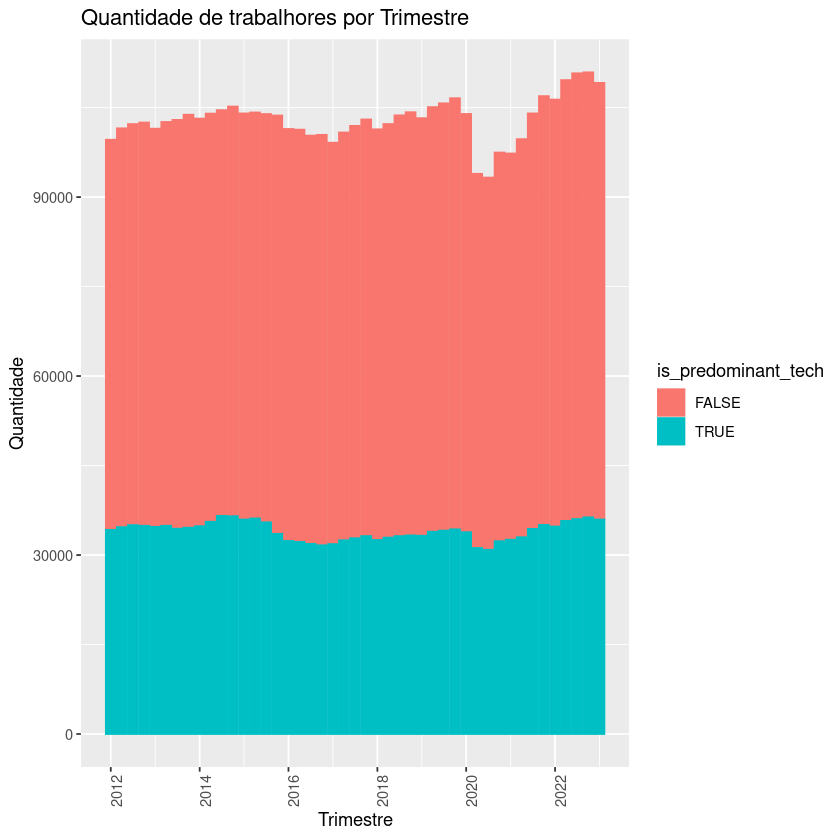

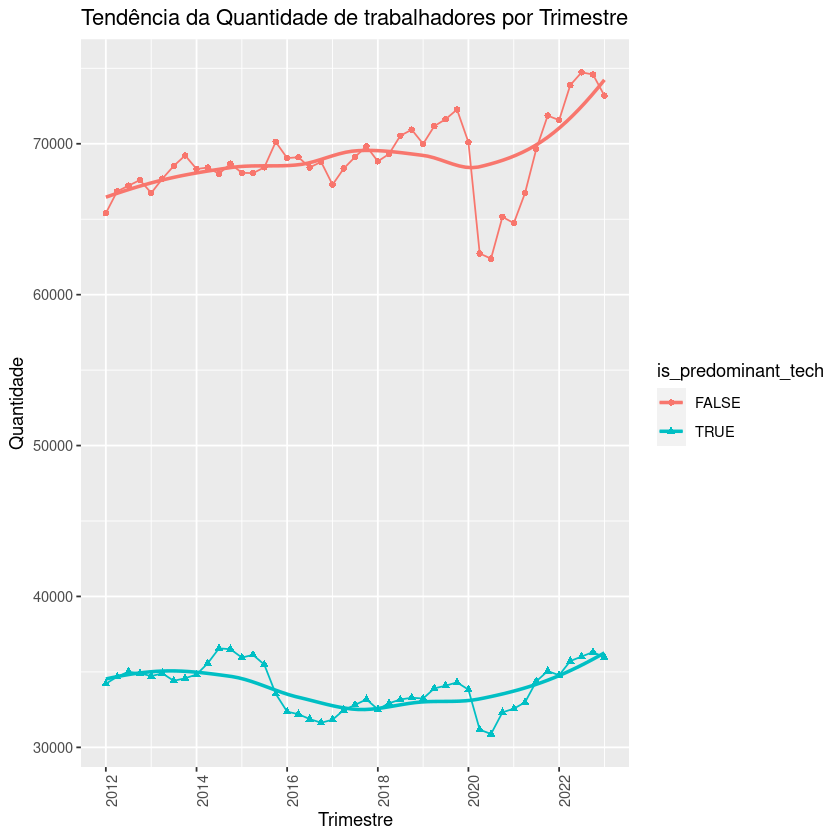

In [24]:
print("Visualizações da quantidade do dataframe agrupado:")
ggplot(subset_is_predominant_tech_by_quantity, aes(x = Trimestre, y = Quantidade, fill = is_predominant_tech, color=is_predominant_tech, shape=is_predominant_tech)) +
    geom_bar(stat = "identity", position = "stack") +
    labs(x = "Trimestre", y = "Quantidade") +
    ggtitle("Quantidade de trabalhores por Trimestre") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

ggplot(subset_is_predominant_tech_by_quantity, aes(x=Trimestre, y=Quantidade, color=is_predominant_tech, shape=is_predominant_tech)) + 
    geom_line() + 
    geom_point() + 
    geom_smooth(method="loess", se=FALSE) +
    labs(title="Tendência da Quantidade de trabalhadores por Trimestre", x="Trimestre", y="Quantidade") + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

## Comparação da quantidade de profissionais por setor durante o levantamento

[1] "Comparação da variação da quantidade entre os setores Tech e No Tech:"


 variacao_quantidade_tech_percent variacao_quantidade_no_tech_percent
 Min.   :-9.7400                  Min.   :-4.600                     
 1st Qu.:-4.1000                  1st Qu.: 3.500                     
 Median : 0.0000                  Median : 5.200                     
 Mean   :-0.6453                  Mean   : 5.454                     
 3rd Qu.: 2.3400                  3rd Qu.: 7.230                     
 Max.   : 6.8600                  Max.   :14.280                     

,Trimestre,variacao_quantidade_tech_percent,variacao_quantidade_no_tech_percent
,<dttm>,<dbl>,<dbl>
45,2023-01-01,5.08,11.91


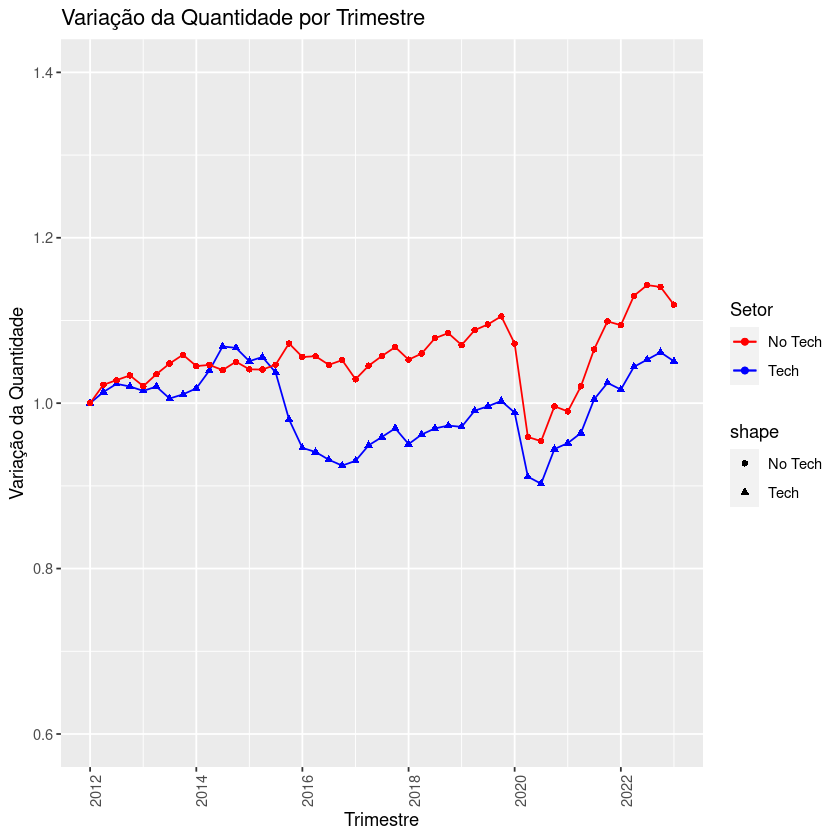

In [25]:
# Criando um subset para os valores TRUE da coluna is_predominant_tech
subset_true <- subset_is_predominant_tech_by_quantity[
  subset_is_predominant_tech_by_quantity$is_predominant_tech == TRUE, 
]

# Criando um subset para os valores FALSE da coluna is_predominant_tech
subset_false <- subset_is_predominant_tech_by_quantity[
  subset_is_predominant_tech_by_quantity$is_predominant_tech == FALSE, 
]

# Criando as colunas variacao_quantidade_tech e variacao_quantidade_no_tech
subset_true$variacao_quantidade_tech <- subset_true$Quantidade / subset_true$Quantidade[1]
subset_false$variacao_quantidade_no_tech <- subset_false$Quantidade / subset_false$Quantidade[1]

# mergeando subset_true e subset_false com as colunas Trimestre, variacao_quantidade_tech e variacao_quantidade_no_tech
merge_subset <- merge(
  subset_true[, c("Trimestre", "variacao_quantidade_tech", "is_predominant_tech")], 
  subset_false[, c("Trimestre", "variacao_quantidade_no_tech", "is_predominant_tech")], 
  by = "Trimestre"
)

merge_subset$variacao_quantidade_tech_percent <- round((merge_subset$variacao_quantidade_tech -1) * 100, 2)
merge_subset$variacao_quantidade_no_tech_percent <- round((merge_subset$variacao_quantidade_no_tech -1) * 100, 2)

print("Comparação da variação da quantidade entre os setores Tech e No Tech:")
summary(merge_subset[c("variacao_quantidade_tech_percent", "variacao_quantidade_no_tech_percent")])

tail(select(merge_subset,c("Trimestre", "variacao_quantidade_tech_percent", "variacao_quantidade_no_tech_percent")), 1)

ggplot(merge_subset, aes(x = Trimestre)) +
  geom_line(aes(y = variacao_quantidade_tech, color = "Tech")) +
  geom_point(aes(y = variacao_quantidade_tech, color = "Tech", shape = "Tech")) +
  geom_line(aes(y = variacao_quantidade_no_tech, color = "No Tech")) +
  geom_point(aes(y = variacao_quantidade_no_tech, color = "No Tech", shape = "No Tech")) +
  labs(title="Variação da Quantidade por Trimestre", x = "Trimestre", y = "Variação da Quantidade") +
  scale_color_manual(values = c("Tech" = "blue", "No Tech" = "red"), name="Setor") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  ylim(0.6, 1.4)


___
* ## **Análise do rendimento de profissionais em setores predominantemente de tecnologia**

## Subset agrupando os Salários pela coluna is_predominant_tech

In [26]:
subset_is_predominant_tech_by_salary <- aggregate(
    cbind(Salário, salario_ajustado) ~ Trimestre + is_predominant_tech, 
    data=dataframe, 
    FUN=mean
)

print("Amostra do dataframe:")
head(subset_is_predominant_tech_by_salary)
print("Sumário estatístico do dataframe agrupado:")
summary(subset_is_predominant_tech_by_salary[c("Salário", "salario_ajustado")])

[1] "Amostra do dataframe:"


,Trimestre,is_predominant_tech,Salário,salario_ajustado
,<dttm>,<lgl>,<dbl>,<dbl>
1,2012-01-01,FALSE,2248.750,2248.750
2,2012-04-01,FALSE,2258.250,2196.115
3,2012-07-01,FALSE,2245.625,2157.088
4,2012-10-01,FALSE,2242.375,2115.881
5,2013-01-01,FALSE,2278.625,2103.391
6,2013-04-01,FALSE,2316.625,2102.310


[1] "Sumário estatístico do dataframe agrupado:"


    Salário     salario_ajustado
 Min.   :2118   Min.   :1144    
 1st Qu.:2283   1st Qu.:1570    
 Median :2656   Median :2045    
 Mean   :2741   Mean   :1979    
 3rd Qu.:3196   3rd Qu.:2237    
 Max.   :3551   Max.   :3079    

## Evolução do salário de profissionais durante o levantamento

[1] "Visualizações do salário do dataframe agrupado:"


`geom_smooth()` using formula = 'y ~ x'


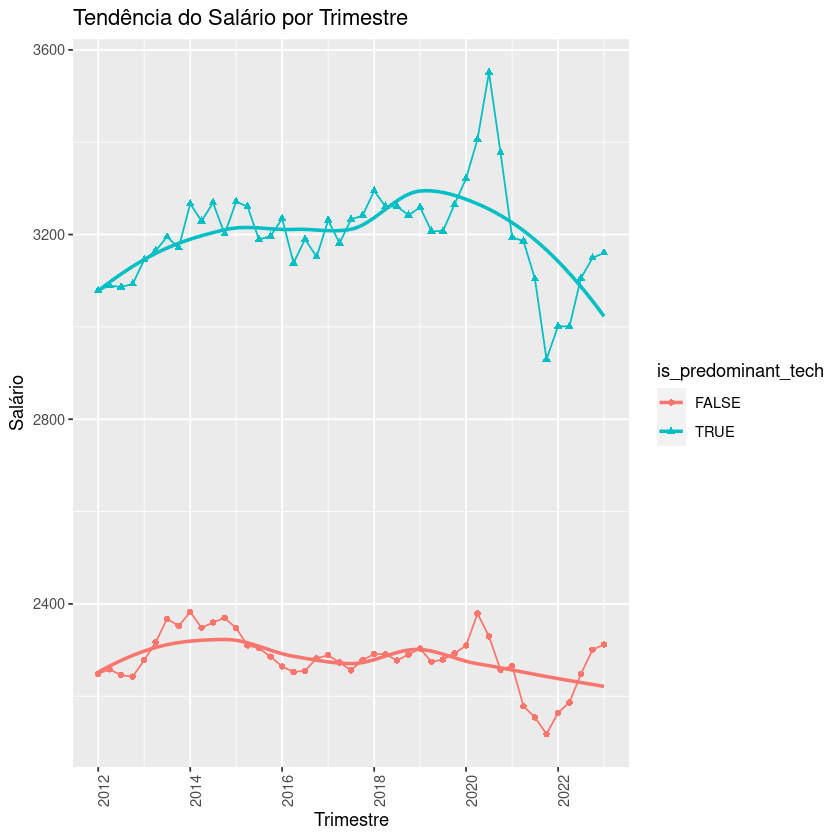

In [27]:
print("Visualizações do salário do dataframe agrupado:")
ggplot(subset_is_predominant_tech_by_salary, aes(x=Trimestre, y=Salário, color=is_predominant_tech, shape=is_predominant_tech)) + 
    geom_line() + 
    geom_point() + 
    geom_smooth(method="loess", se=FALSE) +
    labs(title="Tendência do Salário por Trimestre", x="Trimestre", y="Salário") + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

## Comparação do salário de profissionais durante o levantamento

[1] "Sumário estatístico do subset_true:"


    Salário     salario_ajustado
 Min.   :2930   Min.   :1570    
 1st Qu.:3149   1st Qu.:2083    
 Median :3197   Median :2236    
 Mean   :3200   Mean   :2308    
 3rd Qu.:3260   3rd Qu.:2690    
 Max.   :3551   Max.   :3079    

[1] "Sumário estatístico do subset_false:"


    Salário     salario_ajustado
 Min.   :2118   Min.   :1144    
 1st Qu.:2256   1st Qu.:1468    
 Median :2282   Median :1571    
 Mean   :2282   Mean   :1649    
 3rd Qu.:2310   3rd Qu.:1992    
 Max.   :2382   Max.   :2249    

[1] "Comparação da variação da quantidade entre os setores Tech e No Tech:"


 variacao_salario_tech_percent variacao_salario_no_tech_percent
 Min.   :-4.840                Min.   :-5.800                  
 1st Qu.: 2.280                1st Qu.: 0.330                  
 Median : 3.820                Median : 1.480                  
 Mean   : 3.926                Mean   : 1.463                  
 3rd Qu.: 5.890                3rd Qu.: 2.730                  
 Max.   :15.340                Max.   : 5.950                  

,Trimestre,variacao_salario_tech_percent,variacao_salario_no_tech_percent
,<dttm>,<dbl>,<dbl>
45,2023-01-01,2.64,2.82


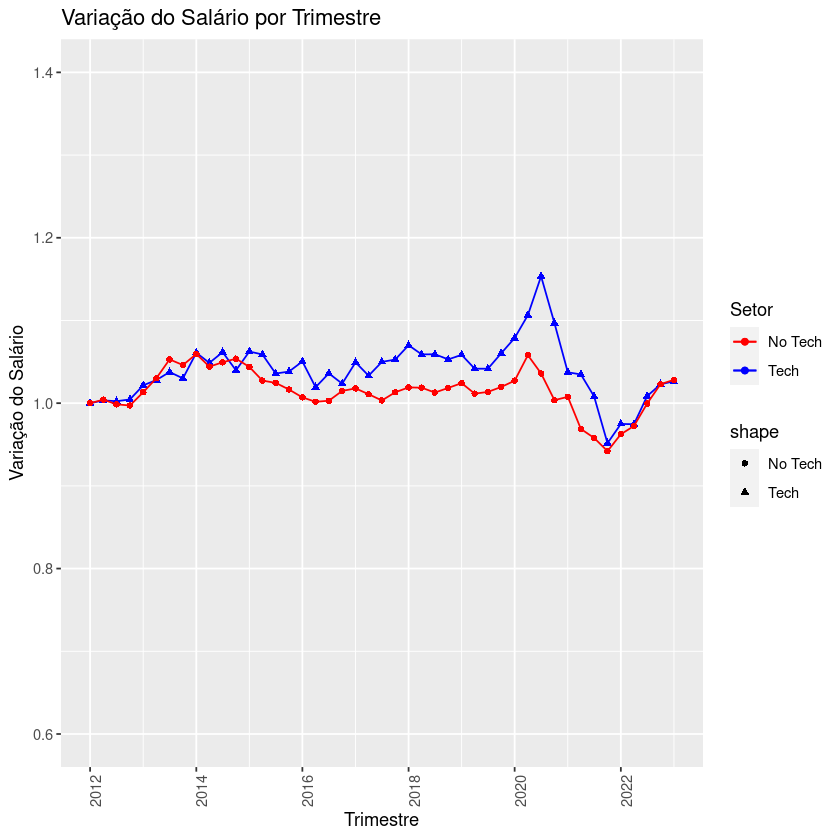

In [28]:
# Criando um subset para os valores TRUE e outro para os valores FALSE
subset_true <- subset_is_predominant_tech_by_salary[
  subset_is_predominant_tech_by_salary$is_predominant_tech == TRUE, 
]

print("Sumário estatístico do subset_true:")
summary(subset_true[c("Salário", "salario_ajustado")])

subset_false <- subset_is_predominant_tech_by_salary[
  subset_is_predominant_tech_by_salary$is_predominant_tech == FALSE, 
]

print("Sumário estatístico do subset_false:")
summary(subset_false[c("Salário", "salario_ajustado")])

subset_true$variacao_salario_tech <- subset_true$Salário / subset_true$Salário[1]
subset_false$variacao_salario_no_tech <- subset_false$Salário / subset_false$Salário[1]

# mergeando subset_true e subset_false com as colunas Trimestre, variacao_salario_tech e variacao_salario_no_tech
merge_subset <- merge(
  subset_true[, c("Trimestre", "variacao_salario_tech", "is_predominant_tech")], 
  subset_false[, c("Trimestre", "variacao_salario_no_tech", "is_predominant_tech")], 
  by = "Trimestre"
)

merge_subset$variacao_salario_tech_percent <- round((merge_subset$variacao_salario_tech -1) * 100, 2)
merge_subset$variacao_salario_no_tech_percent <- round((merge_subset$variacao_salario_no_tech -1) * 100, 2)

print("Comparação da variação da quantidade entre os setores Tech e No Tech:")
summary(merge_subset[c("variacao_salario_tech_percent", "variacao_salario_no_tech_percent")])

tail(select(merge_subset,c("Trimestre", "variacao_salario_tech_percent", "variacao_salario_no_tech_percent")), 1)

ggplot(merge_subset, aes(x = Trimestre)) +
  geom_line(aes(y = variacao_salario_tech, color = "Tech")) +
  geom_point(aes(y = variacao_salario_tech, color = "Tech", shape = "Tech")) +
  geom_line(aes(y = variacao_salario_no_tech, color = "No Tech")) +
  geom_point(aes(y = variacao_salario_no_tech, color = "No Tech", shape = "No Tech")) +
  labs(title="Variação do Salário por Trimestre", x = "Trimestre", y = "Variação do Salário") +
  scale_color_manual(values = c("Tech" = "blue", "No Tech" = "red"), name="Setor") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  ylim(0.6, 1.4)


## Comparação do salário ajustado de profissionais durante o levantamento

[1] "Comparação da variação da quantidade entre os setores Tech e No Tech:"


 variacao_salario_ajustado_tech_percent
 Min.   :-49.00                        
 1st Qu.:-32.33                        
 Median :-27.39                        
 Mean   :-25.04                        
 3rd Qu.:-12.62                        
 Max.   :  0.00                        
 variacao_salario_ajustado_no_tech_percent
 Min.   :-49.11                           
 1st Qu.:-34.72                           
 Median :-30.15                           
 Mean   :-26.66                           
 3rd Qu.:-11.44                           
 Max.   :  0.00                           

,Trimestre,variacao_salario_ajustado_tech_percent,variacao_salario_ajustado_no_tech_percent
,<dttm>,<dbl>,<dbl>
45,2023-01-01,-47.26,-47.17


Warning message:
“Removed 7 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 7 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 8 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 8 rows containing missing values (`geom_point()`).”


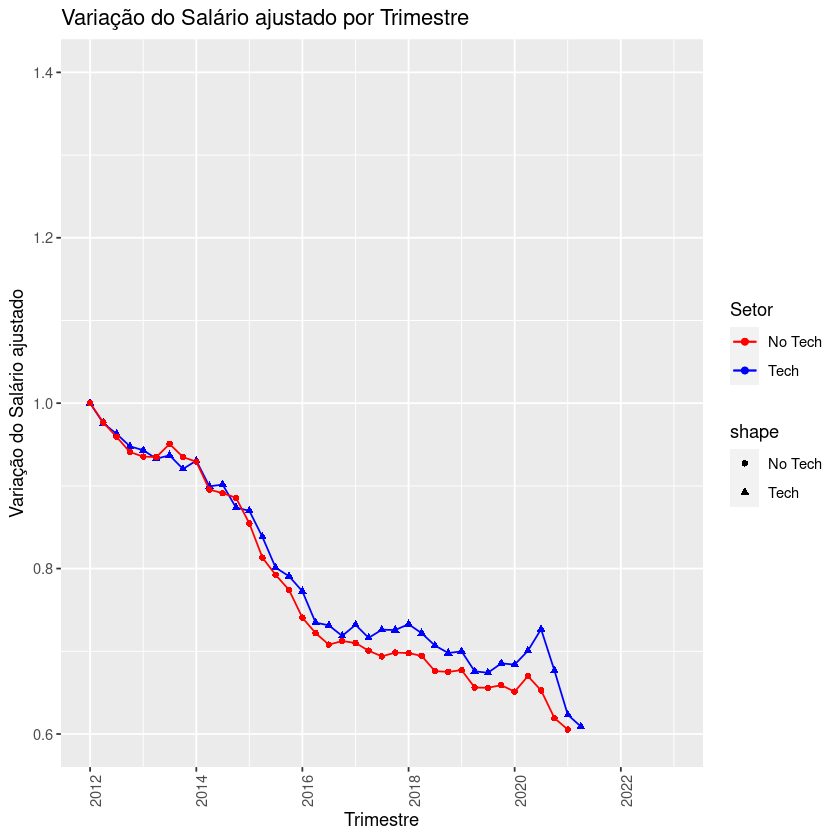

In [29]:
# Criando um subset para os valores TRUE e outro para os valores FALSE
subset_true <- subset_is_predominant_tech_by_salary[
  subset_is_predominant_tech_by_salary$is_predominant_tech == TRUE, 
]

subset_false <- subset_is_predominant_tech_by_salary[
  subset_is_predominant_tech_by_salary$is_predominant_tech == FALSE, 
]

subset_true$variacao_salario_ajustado_tech <- subset_true$salario_ajustado / subset_true$salario_ajustado[1]
subset_false$variacao_salario_ajustado_no_tech <- subset_false$salario_ajustado / subset_false$salario_ajustado[1]

# mergeando subset_true e subset_false com as colunas Trimestre, variacao_salario_ajustado_tech e variacao_salario_ajustado_no_tech
merge_subset <- merge(
  subset_true[, c("Trimestre", "variacao_salario_ajustado_tech", "is_predominant_tech")], 
  subset_false[, c("Trimestre", "variacao_salario_ajustado_no_tech", "is_predominant_tech")], 
  by = "Trimestre"
)

merge_subset$variacao_salario_ajustado_tech_percent <- round((merge_subset$variacao_salario_ajustado_tech -1) * 100, 2)
merge_subset$variacao_salario_ajustado_no_tech_percent <- round((merge_subset$variacao_salario_ajustado_no_tech -1) * 100, 2)

print("Comparação da variação da quantidade entre os setores Tech e No Tech:")
summary(merge_subset[c("variacao_salario_ajustado_tech_percent", "variacao_salario_ajustado_no_tech_percent")])

tail(select(merge_subset,c("Trimestre", "variacao_salario_ajustado_tech_percent", "variacao_salario_ajustado_no_tech_percent")), 1)

ggplot(merge_subset, aes(x = Trimestre)) +
  geom_line(aes(y = variacao_salario_ajustado_tech, color = "Tech")) +
  geom_point(aes(y = variacao_salario_ajustado_tech, color = "Tech", shape = "Tech")) +
  geom_line(aes(y = variacao_salario_ajustado_no_tech, color = "No Tech")) +
  geom_point(aes(y = variacao_salario_ajustado_no_tech, color = "No Tech", shape = "No Tech")) +
  labs(title="Variação do Salário ajustado por Trimestre", x = "Trimestre", y = "Variação do Salário ajustado") +
  scale_color_manual(values = c("Tech" = "blue", "No Tech" = "red"), name="Setor") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  ylim(0.6, 1.4)


## 

___
* # **Conclusões:**
    ## **1. Objetivos:**
        O objetivo foi identificar se setores predominantemente tecnológicos tiveram aumento na quantidade e salário dos trabalhadores durante o período do levantamento (2012 a 2023). A idéia é investigar a maior presença de setores tencológicos no mercado de trabalho brasileiro com a observação dessas duas variáveis.
        A base dos dados foi o sistema Sidra do IBGE para definição da quantidade (tabela 5434), salário (tabela 5442) e inflação (tabela 1736) utilizados.

    ## **2. Respostas dos dados:**
        Das perguntas que nortearam a pesquisa, essas são as considerações com o levantamento feito:

        1. Houve crescimento na quantidade de trabalhadores de 5.08% do grupo de setores definidos como predominantemente tecnológicos² de 2012 a 2023.
        1.1. No grupo de setores não tecnológicos, o crescimento no mesmo período foi de 11.91%.

        2. Houve crescimentos no rendimentos médio de 2.64% dos trabalhadores do grupo de setores definidos como predominantemente tecnológicos² de 2012 a 2023.
        2.1. No grupo de setores não tecnológicos, o crescimento no mesmo período foi de 2.82%, apesar do maior valor médio do setor tech.
        2.2. Considerando a inflação, a variação dos redimentos médio foi negativa para o grupo de setores tecnológicos e não tecnológicos de -47.26%	e -47.17% respectivamente.

    ## **3. Considerações:**
        Das análises, observa-se crescimento inferior tanto da quantidade como dos rendimentos dos setores predominantes tecnológicos em comparação aos não tecnológicos.

        O levantamento sugere que não há maior presença dos setores tecnológicos no mercado de trabalho brasileiro mesmo com rendimentos superiores aos não tecnológicos (entre R$2930-R$3551 frente a R$2118-R$2382).

    ## **4. Limitações:**
        A amostra tem características que limitaram a identificação dos setores predominantemente tecnológicos, o que permitiria maior assertividade na observação dos resultados.

    ## **5. Próximos passos:**
        Em futuros trabalhos instrumentos de análise das séries temporais (quebras estruturais, análise de variância, etc...) podem beneficiar a análise, também a utilização de outras bases de dados para maior acurácia na separação dos setores.